## Image Captioning with PyTorch

PyTorch is a popular open source framework primarily used in NLP and computer vision applications. It was developed by Facebook AI. It utilized GPUs uniquely and efficiently, making it an efficient tool to implement neural networks for deep learning applications. 

This notebook uses pre-trained models implementing PyTorch. The models were trained on the [MS-COCO 2017](https://cocodataset.org/#home) dataset.

In [ ]:
from google.colab import drive
import sys
import os
import os.path
import numpy as np
from keras.preprocessing.image import load_img, img_to_array  
import matplotlib.pyplot as plt  
import requests
from io import BytesIO
from PIL import Image
from google.colab import files

1. Clone the repository with the necessary code and models.

In [ ]:
!git clone https://github.com/urmikakasi/ImageCaptioningWithPyTorch.git

Cloning into 'ImageCaptioningWithPyTorch'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 241 (delta 128), reused 72 (delta 27), pack-reused 0
Receiving objects: 100% (241/241), 4.69 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [ ]:
%cd ImageCaptioningWithPyTorch

/content/ImageCaptioningWithPyTorch


2. Install runtime requirements.

In [ ]:
!pip install -r requirements.txt


     |████████████████████████████████| 3.5 MB 18.3 MB/s 
     |████████████████████████████████| 6.8 MB 53.0 MB/s 
     |████████████████████████████████| 895 kB 43.0 MB/s 
     |████████████████████████████████| 596 kB 50.1 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Given the caption generated by the model and the image's path, the code below 
generates a caption for the provided image and displays
  the same with the original image.

In [ ]:
def view_img_caption_pair(restext, image_path):
  
  text = restext
  if image_path.startswith('http'):
    response = requests.get(image_path)
    im = np.array(Image.open(BytesIO(response.content)))
  else:
    im  = np.array(load_img(image_path))
  fig, ax = plt.subplots(1, 2, figsize = (10,10))

  ax[0].imshow(im)
  ax[0].axis('off')
  ax[0].set_title('Image', fontsize = 15)

  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  ax[1].set_xlim([0,0.5])
  ax[1].set_ylim([0,0.5])
  ax[1].text(0, 0.45, text, transform=ax[1].transAxes, fontsize=20,
        verticalalignment='center', bbox=props)
  ax[1].axis('off');
  return fig

Some helper code for batch processing all the images in the img/ folder.

In [ ]:

all_imgs = []
img_names=[]
img_exts=[]

path = "/content/ImageCaptioningWithPyTorch/img"
valid_images = [".jpg",".gif",".png",".tga",".jpeg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    
    if ext.lower() not in valid_images:
        continue
    all_imgs.append(Image.open(os.path.join(path,f)))
    img_names.append(os.path.splitext(f)[0])
    img_exts.append(os.path.splitext(f)[1])

3. Run inference.

You can run inference on some pre-loaded sample images in the img/ folder.

In [ ]:
!ls img/

airplane.jpeg  cake.jpeg   girl.png   office.png
baby.jpeg      cruise.png  horse.png


In [ ]:
#bug fix for duplicate image display
%matplotlib
%matplotlib

Using matplotlib backend: agg
Using matplotlib backend: agg


Attempt 1:
Figure(720x720)


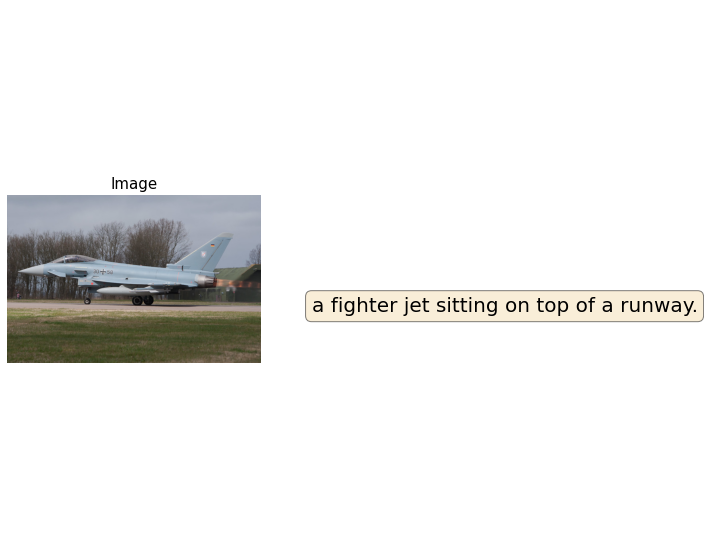

In [ ]:
image_path="img/airplane.jpeg" #replace with img/one-of-the-sample-images to run inference on the other images
results = !python predict.py --path {image_path}
caption = results[-1]
res_img= view_img_caption_pair(caption,image_path)
res_img

Or, you can enter the URL of any image on the internet and store it in the image_path variable.

Attempt 1:
Figure(720x720)


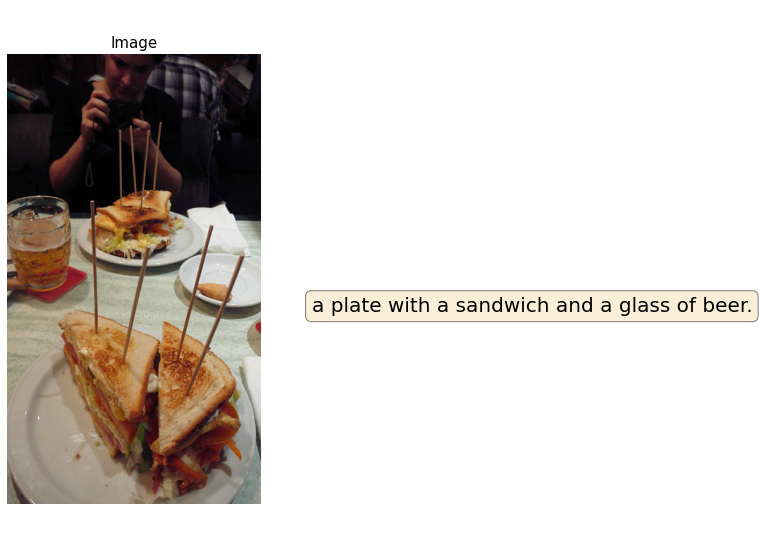

In [ ]:
image_path= "https://farm5.staticflickr.com/4017/4285202578_bfbe897cf8_z.jpg"  #you can put your own image URL here
results = !python predict.py --path {image_path}  
caption = results[-1]
view_img_caption_pair(caption,image_path) 

Or, you can run inference on all the images in the img/ folder.

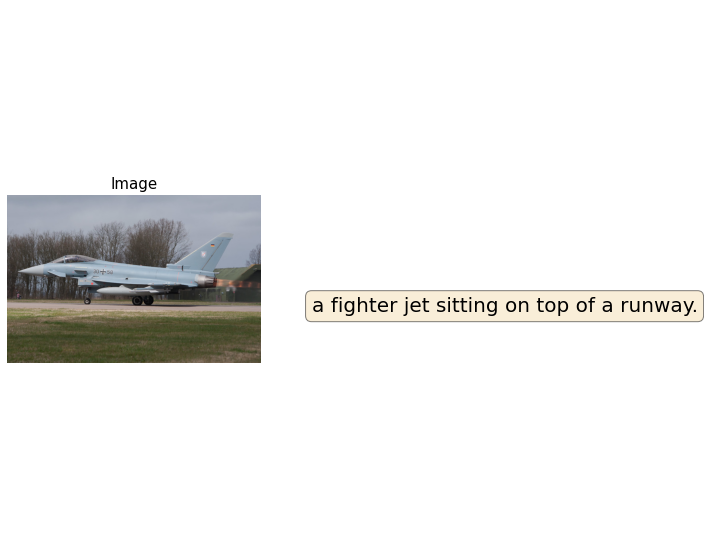

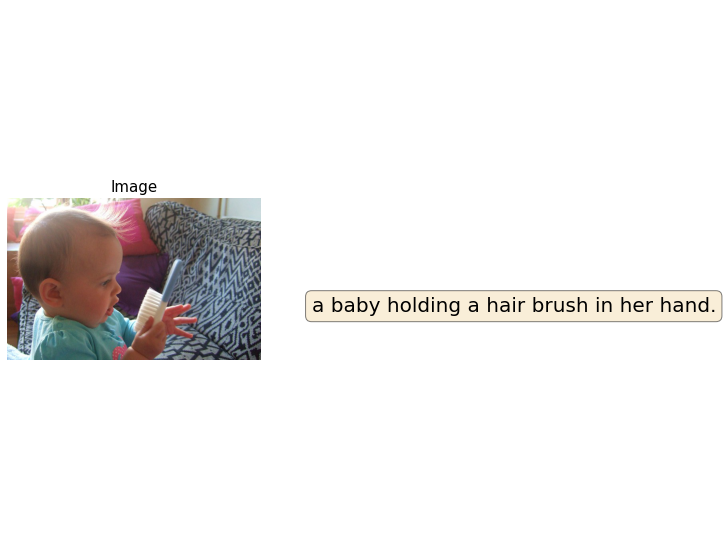

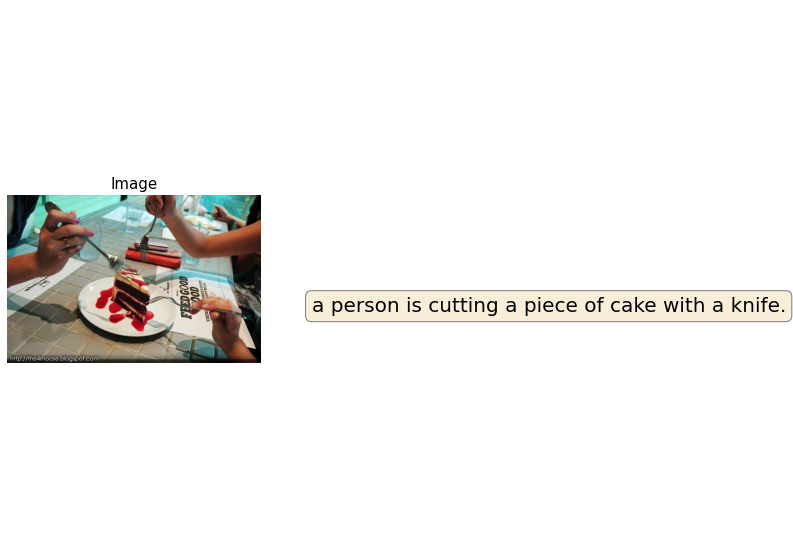

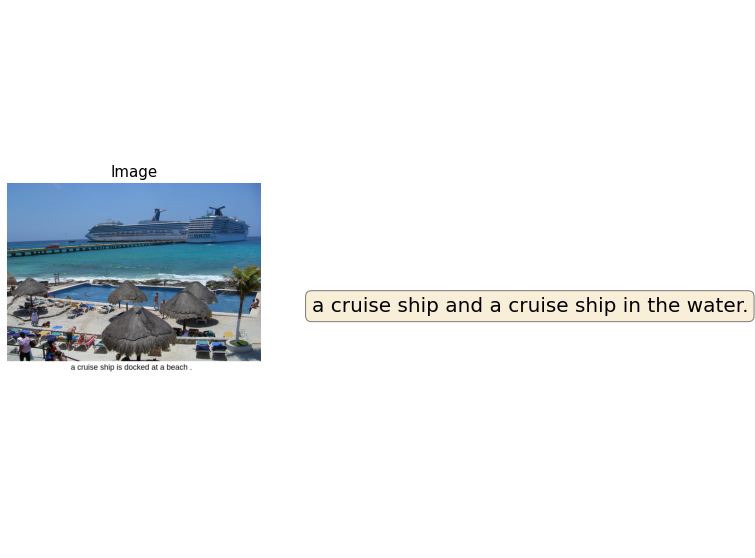

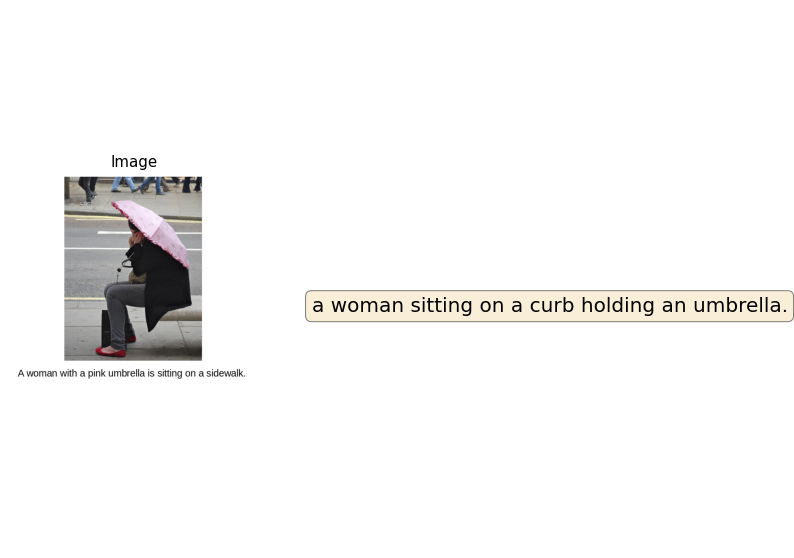

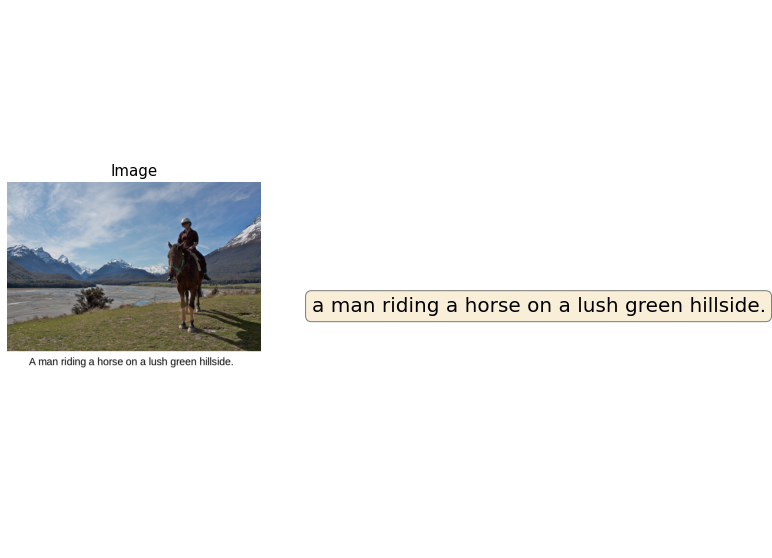

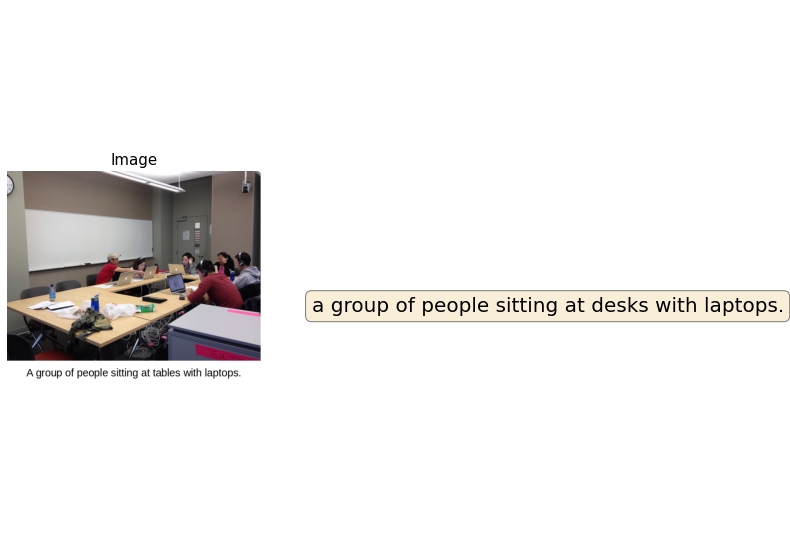

In [ ]:
import matplotlib.backends.backend_pdf
# import glob
# import shutil
pdf = matplotlib.backends.backend_pdf.PdfPages("/content/drive/MyDrive/Colab Notebooks/ImageCaptioningWithPyTorch/output.pdf")
all_figs=[]
all_captions=[]
for i in range(0,len(all_imgs)):
    pic_path="img/"+img_names[i]+img_exts[i]
    temp= !python predict.py --path {pic_path}
    temp=temp[-1]
    all_captions.append(temp)
    all_figs.append(  view_img_caption_pair(all_captions[i], pic_path))
    pdf.savefig(all_figs[i])

pdf.close()


We see that our file "output.pdf" containing all the images and captions is written into the current working directory.

In [ ]:
!ls

catr_demo.ipynb   engine.py    img	models	    __pycache__
configuration.py  finetune.py  LICENSE	output.pdf  requirements.txt
datasets	  hubconf.py   main.py	predict.py


To download the file to your system, run the following cell:

In [ ]:
files.download('output.pdf')